In [1]:
import pandas as pd
import os
import sys
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/final/dataset.csv', encoding="latin1")


In [3]:
df

,File_id,Word,Tag
0,105,Name,O
1,105,:,O
2,105,Tan,B-NAME
3,105,Gang,I-NAME
4,105,Lun,I-NAME
...,...,...,...
160120,99,Expected,O
160121,99,salary,O
160122,99,:,O
160123,99,$,O


In [4]:
words = df['Word'].values
tags = df['Tag'].values

In [5]:
print(f'Total # tokens: {len(words)}')

Total # tokens: 160125


In [6]:
print(f'Total # unique tokens: {len(set(words))}')

Total # unique tokens: 14399


In [7]:
print(f'Average document length: {(len(words)/198)}')

Average document length: 808.7121212121212


In [8]:
# counter labels
c = Counter(tags)
d = Counter({k: c for k, c in c.items() if c < 2000})

In [9]:
print(f'Class count: {c}')

Class count: Counter({'O': 157678, 'I-ADDRESS': 702, 'I-PHONE': 441, 'I-NAME': 261, 'B-NAME': 226, 'B-PHONE': 221, 'B-EMAIL': 204, 'B-ADDRESS': 116, 'I-DOB': 101, 'B-NATIONALITY': 66, 'B-DOB': 53, 'B-GENDER': 29, 'B-AGE': 17, 'B-ETHNICITY': 7, 'B-RELIGION': 2, 'I-NATIONALITY': 1})


In [47]:
frequencies = list(d.values())
x_labels = list(d.keys())
freq_series = pd.Series(frequencies)

In [60]:
from sklearn.utils import shuffle

class DocumentGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.documents = self.data.groupby("File_id").apply(agg_func)
        
        
        self.train_size = 0.8
        self.test_size = 0.1
        self.dev_size = 0.1

    def get_next(self):
        try:
            s = self.grouped["{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [80]:
doc_Getter = DocumentGetter(df)

In [81]:
lengths = []


In [82]:
for doc in doc_Getter.documents:
    lengths.append(len(doc))


In [83]:
print(sum(lengths) / len(lengths))

808.7121212121212


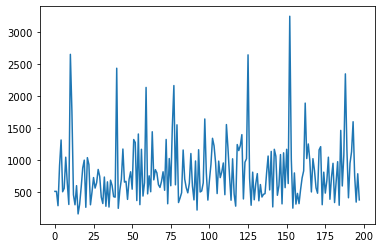

In [84]:
plt.plot(lengths)

In [85]:
print(min(lengths))

165


In [86]:
print(max(lengths))

3242


(array([ 2.,  7., 17., 10., 11., 19., 10., 16., 12., 10., 13.,  3.,  7.,
        10.,  8.,  5., 10.,  5.,  4.,  1.,  3.,  1.,  3.,  1.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 165.  ,  226.54,  288.08,  349.62,  411.16,  472.7 ,  534.24,
         595.78,  657.32,  718.86,  780.4 ,  841.94,  903.48,  965.02,
        1026.56, 1088.1 , 1149.64, 1211.18, 1272.72, 1334.26, 1395.8 ,
        1457.34, 1518.88, 1580.42, 1641.96, 1703.5 , 1765.04, 1826.58,
        1888.12, 1949.66, 2011.2 , 2072.74, 2134.28, 2195.82, 2257.36,
        2318.9 , 2380.44, 2441.98, 2503.52, 2565.06, 2626.6 , 2688.14,
        2749.68, 2811.22, 2872.76, 2934.3 , 2995.84, 3057.38, 3118.92,
        3180.46, 3242.  ]),
 <a list of 50 Patch objects>)

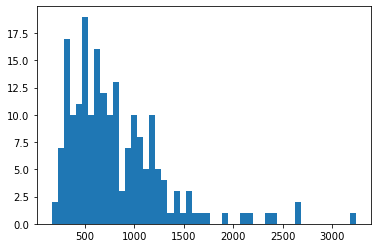

In [87]:
plt.hist(lengths, bins=50)

In [88]:
import pandas as pd 
pd.DataFrame(lengths).to_csv("lengths.csv")